In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_111'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

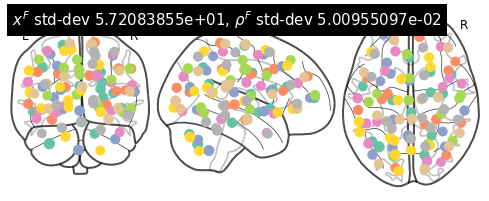

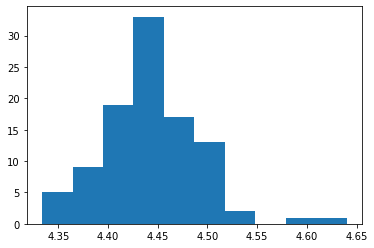

(<nilearn.plotting.displays.OrthoProjector at 0x7f9500292e80>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

144

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Heights_b_3.mov',
 'Heights_b_4.mp4',
 'Spiders_b_4.m4v',
 'Spiders_b_1.m4v',
 'Heights_b_2.m4v',
 'Heights_b_1.mp4',
 'Social_b_2.mov',
 'Social_a_2.m4v',
 'Social_a_4.mp4',
 'Social_b_4.mov',
 'Spiders_b_3.mov',
 'Spiders_b_2.mp4',
 'Spiders_a_1.m4v',
 'Social_b_3.mp4',
 'Spiders_a_4.mov',
 'Heights_a_1.mp4',
 'Spiders_a_3.m4v',
 'Heights_a_2.m4v',
 'Heights_a_3.mp4',
 'Social_a_3.mp4',
 'Social_b_1.mp4',
 'Social_a_1.mp4',
 'Heights_a_4.mp4',
 'Spiders_a_2.mp4']

In [12]:
dtfa.subjects()

[150, 158, 159, 161, 166, 169]

In [13]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=80, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=1, l_s=1, l_i=1)

10/20/2021 16:16:49 [Epoch 1] (43640ms) ELBO -3.73726863e+10 = log-likelihood -3.73703150e+10 - KL from prior 2.36284639e+06, P weight penalty 2.71639419e+03, S weight penalty 3.07000478e+03, I weight penalty 2.70884818e+03
10/20/2021 16:16:49 Saving checkpoint...
10/20/2021 16:16:55 [Epoch 2] (6792ms) ELBO -3.63369365e+10 = log-likelihood -3.63346882e+10 - KL from prior 2.24016442e+06, P weight penalty 2.44012678e+03, S weight penalty 2.38804122e+03, I weight penalty 2.50138330e+03
10/20/2021 16:17:02 [Epoch 3] (6868ms) ELBO -3.56747301e+10 = log-likelihood -3.56725611e+10 - KL from prior 2.16122445e+06, P weight penalty 2.21593798e+03, S weight penalty 2.13092683e+03, I weight penalty 2.35128192e+03
10/20/2021 16:17:09 [Epoch 4] (7033ms) ELBO -3.52007503e+10 = log-likelihood -3.51986379e+10 - KL from prior 2.10484857e+06, P weight penalty 1.76203062e+03, S weight penalty 2.14371417e+03, I weight penalty 2.19575791e+03
10/20/2021 16:17:16 [Epoch 5] (7026ms) ELBO -3.48814294e+10 = log-

10/20/2021 16:21:02 [Epoch 38] (6785ms) ELBO -2.87801107e+10 = log-likelihood -2.87794268e+10 - KL from prior 6.84196264e+05, P weight penalty 4.74718304e+02, S weight penalty 6.16312438e+02, I weight penalty 7.23139622e+02
10/20/2021 16:21:09 [Epoch 39] (6786ms) ELBO -2.87104928e+10 = log-likelihood -2.87098132e+10 - KL from prior 6.79678456e+05, P weight penalty 4.82830507e+02, S weight penalty 5.74563460e+02, I weight penalty 7.27022865e+02
10/20/2021 16:21:15 [Epoch 40] (6785ms) ELBO -2.86305650e+10 = log-likelihood -2.86298860e+10 - KL from prior 6.78996163e+05, P weight penalty 4.63595737e+02, S weight penalty 5.57357597e+02, I weight penalty 7.30124300e+02
10/20/2021 16:21:22 [Epoch 41] (6786ms) ELBO -2.85685624e+10 = log-likelihood -2.85678845e+10 - KL from prior 6.77683774e+05, P weight penalty 4.71651722e+02, S weight penalty 5.50119036e+02, I weight penalty 7.29964718e+02
10/20/2021 16:21:29 [Epoch 42] (6749ms) ELBO -2.85031381e+10 = log-likelihood -2.85024590e+10 - KL from 

10/20/2021 16:25:17 [Epoch 75] (7039ms) ELBO -2.74937190e+10 = log-likelihood -2.74929112e+10 - KL from prior 8.07706509e+05, P weight penalty 3.18217354e+02, S weight penalty 5.02175539e+02, I weight penalty 7.88824924e+02
10/20/2021 16:25:24 [Epoch 76] (6933ms) ELBO -2.74818805e+10 = log-likelihood -2.74810684e+10 - KL from prior 8.11933281e+05, P weight penalty 3.36387258e+02, S weight penalty 4.59381702e+02, I weight penalty 7.84401249e+02
10/20/2021 16:25:31 [Epoch 77] (6753ms) ELBO -2.74626065e+10 = log-likelihood -2.74617920e+10 - KL from prior 8.14771430e+05, P weight penalty 3.25755426e+02, S weight penalty 5.06899306e+02, I weight penalty 7.82945825e+02
10/20/2021 16:25:37 [Epoch 78] (6762ms) ELBO -2.74490571e+10 = log-likelihood -2.74482373e+10 - KL from prior 8.19716333e+05, P weight penalty 3.16035715e+02, S weight penalty 4.99086683e+02, I weight penalty 7.79284221e+02
10/20/2021 16:25:44 [Epoch 79] (7026ms) ELBO -2.74339747e+10 = log-likelihood -2.74331529e+10 - KL from 

10/20/2021 16:29:33 [Epoch 112] (6792ms) ELBO -2.71188438e+10 = log-likelihood -2.71179299e+10 - KL from prior 9.13784633e+05, P weight penalty 2.55222313e+02, S weight penalty 6.79804173e+02, I weight penalty 6.43962716e+02
10/20/2021 16:29:40 [Epoch 113] (6802ms) ELBO -2.71070399e+10 = log-likelihood -2.71061240e+10 - KL from prior 9.15867337e+05, P weight penalty 2.84785974e+02, S weight penalty 6.89754405e+02, I weight penalty 6.41374653e+02
10/20/2021 16:29:47 [Epoch 114] (6792ms) ELBO -2.71048022e+10 = log-likelihood -2.71038839e+10 - KL from prior 9.18622649e+05, P weight penalty 2.79136626e+02, S weight penalty 7.07736828e+02, I weight penalty 6.31906215e+02
10/20/2021 16:29:54 [Epoch 115] (6792ms) ELBO -2.70960947e+10 = log-likelihood -2.70951737e+10 - KL from prior 9.20973337e+05, P weight penalty 2.72851007e+02, S weight penalty 7.32277167e+02, I weight penalty 6.28977943e+02
10/20/2021 16:30:00 [Epoch 116] (6794ms) ELBO -2.70939768e+10 = log-likelihood -2.70930532e+10 - KL 

10/20/2021 16:33:46 [Epoch 149] (6746ms) ELBO -2.69225358e+10 = log-likelihood -2.69215447e+10 - KL from prior 9.91009185e+05, P weight penalty 2.73312310e+02, S weight penalty 7.95236944e+02, I weight penalty 5.42428637e+02
10/20/2021 16:33:52 [Epoch 150] (6746ms) ELBO -2.69240703e+10 = log-likelihood -2.69230779e+10 - KL from prior 9.92306602e+05, P weight penalty 2.72647160e+02, S weight penalty 7.69388946e+02, I weight penalty 5.40818747e+02
10/20/2021 16:33:59 [Epoch 151] (7003ms) ELBO -2.69158837e+10 = log-likelihood -2.69148885e+10 - KL from prior 9.95299096e+05, P weight penalty 2.62101751e+02, S weight penalty 7.88025565e+02, I weight penalty 5.39194691e+02
10/20/2021 16:34:06 [Epoch 152] (7041ms) ELBO -2.69167256e+10 = log-likelihood -2.69157289e+10 - KL from prior 9.96590496e+05, P weight penalty 2.67284444e+02, S weight penalty 7.47996101e+02, I weight penalty 5.42034479e+02
10/20/2021 16:34:13 [Epoch 153] (7009ms) ELBO -2.69117795e+10 = log-likelihood -2.69107811e+10 - KL 

10/20/2021 16:38:02 [Epoch 186] (7039ms) ELBO -2.68212958e+10 = log-likelihood -2.68202439e+10 - KL from prior 1.05176732e+06, P weight penalty 2.67716240e+02, S weight penalty 8.07524077e+02, I weight penalty 5.25193856e+02
10/20/2021 16:38:09 [Epoch 187] (6973ms) ELBO -2.68167117e+10 = log-likelihood -2.68156592e+10 - KL from prior 1.05257302e+06, P weight penalty 2.53332127e+02, S weight penalty 8.20632736e+02, I weight penalty 5.22925332e+02
10/20/2021 16:38:16 [Epoch 188] (6940ms) ELBO -2.68187138e+10 = log-likelihood -2.68176587e+10 - KL from prior 1.05486593e+06, P weight penalty 2.53438301e+02, S weight penalty 8.09291560e+02, I weight penalty 5.24674658e+02
10/20/2021 16:38:22 [Epoch 189] (6781ms) ELBO -2.68149314e+10 = log-likelihood -2.68138756e+10 - KL from prior 1.05562946e+06, P weight penalty 2.85010954e+02, S weight penalty 8.23548729e+02, I weight penalty 5.23134092e+02
10/20/2021 16:38:29 [Epoch 190] (6782ms) ELBO -2.68181510e+10 = log-likelihood -2.68170932e+10 - KL 

10/20/2021 16:42:14 [Epoch 223] (6786ms) ELBO -2.67589939e+10 = log-likelihood -2.67578922e+10 - KL from prior 1.10135232e+06, P weight penalty 2.92200562e+02, S weight penalty 8.25343815e+02, I weight penalty 5.05077741e+02
10/20/2021 16:42:21 [Epoch 224] (6786ms) ELBO -2.67594727e+10 = log-likelihood -2.67583700e+10 - KL from prior 1.10242326e+06, P weight penalty 2.99906488e+02, S weight penalty 8.44939183e+02, I weight penalty 5.04481070e+02
10/20/2021 16:42:28 [Epoch 225] (6785ms) ELBO -2.67539248e+10 = log-likelihood -2.67528206e+10 - KL from prior 1.10401875e+06, P weight penalty 2.90238246e+02, S weight penalty 8.47792803e+02, I weight penalty 5.02982605e+02
10/20/2021 16:42:34 [Epoch 226] (6790ms) ELBO -2.67544852e+10 = log-likelihood -2.67533797e+10 - KL from prior 1.10551105e+06, P weight penalty 2.74888797e+02, S weight penalty 8.49081580e+02, I weight penalty 5.02401030e+02
10/20/2021 16:42:41 [Epoch 227] (6990ms) ELBO -2.67516021e+10 = log-likelihood -2.67504968e+10 - KL 

10/20/2021 16:46:30 [Epoch 260] (6950ms) ELBO -2.67092765e+10 = log-likelihood -2.67081344e+10 - KL from prior 1.14190809e+06, P weight penalty 3.21230678e+02, S weight penalty 8.94959013e+02, I weight penalty 4.83592836e+02
10/20/2021 16:46:37 [Epoch 261] (7000ms) ELBO -2.67062545e+10 = log-likelihood -2.67051114e+10 - KL from prior 1.14276986e+06, P weight penalty 3.16961247e+02, S weight penalty 8.53230764e+02, I weight penalty 4.81130373e+02
10/20/2021 16:46:44 [Epoch 262] (6795ms) ELBO -2.67072056e+10 = log-likelihood -2.67060613e+10 - KL from prior 1.14411737e+06, P weight penalty 3.21841416e+02, S weight penalty 8.68522770e+02, I weight penalty 4.79082018e+02
10/20/2021 16:46:50 [Epoch 263] (6764ms) ELBO -2.67054326e+10 = log-likelihood -2.67042876e+10 - KL from prior 1.14472487e+06, P weight penalty 3.15243123e+02, S weight penalty 8.94458320e+02, I weight penalty 4.80984642e+02
10/20/2021 16:46:57 [Epoch 264] (6736ms) ELBO -2.67053126e+10 = log-likelihood -2.67041665e+10 - KL 

10/20/2021 16:50:45 [Epoch 297] (6779ms) ELBO -2.66680572e+10 = log-likelihood -2.66668810e+10 - KL from prior 1.17606262e+06, P weight penalty 3.21995612e+02, S weight penalty 9.34716742e+02, I weight penalty 4.58044122e+02
10/20/2021 16:50:51 [Epoch 298] (6762ms) ELBO -2.66708290e+10 = log-likelihood -2.66696514e+10 - KL from prior 1.17744475e+06, P weight penalty 3.37834904e+02, S weight penalty 9.19742342e+02, I weight penalty 4.55636603e+02
10/20/2021 16:50:58 [Epoch 299] (6811ms) ELBO -2.66692324e+10 = log-likelihood -2.66680540e+10 - KL from prior 1.17801275e+06, P weight penalty 3.31148670e+02, S weight penalty 9.29848728e+02, I weight penalty 4.56298194e+02
10/20/2021 16:51:05 [Epoch 300] (6733ms) ELBO -2.66712086e+10 = log-likelihood -2.66700280e+10 - KL from prior 1.18007271e+06, P weight penalty 3.31547789e+02, S weight penalty 9.11300049e+02, I weight penalty 4.55603605e+02
10/20/2021 16:51:12 [Epoch 301] (6735ms) ELBO -2.66667239e+10 = log-likelihood -2.66655435e+10 - KL 

10/20/2021 16:54:58 [Epoch 334] (6802ms) ELBO -2.66402496e+10 = log-likelihood -2.66390409e+10 - KL from prior 1.20825053e+06, P weight penalty 3.28463163e+02, S weight penalty 9.96612123e+02, I weight penalty 4.33992353e+02
10/20/2021 16:55:05 [Epoch 335] (6768ms) ELBO -2.66383067e+10 = log-likelihood -2.66370977e+10 - KL from prior 1.20851798e+06, P weight penalty 3.54019942e+02, S weight penalty 1.01279565e+03, I weight penalty 4.36873478e+02
10/20/2021 16:55:12 [Epoch 336] (6768ms) ELBO -2.66414739e+10 = log-likelihood -2.66402641e+10 - KL from prior 1.20919877e+06, P weight penalty 3.25407002e+02, S weight penalty 9.96046965e+02, I weight penalty 4.34132155e+02
10/20/2021 16:55:18 [Epoch 337] (6808ms) ELBO -2.66373578e+10 = log-likelihood -2.66361462e+10 - KL from prior 1.21105038e+06, P weight penalty 3.67526168e+02, S weight penalty 1.01292726e+03, I weight penalty 4.35575553e+02
10/20/2021 16:55:25 [Epoch 338] (6988ms) ELBO -2.66416652e+10 = log-likelihood -2.66404542e+10 - KL 

10/20/2021 16:59:12 [Epoch 371] (6774ms) ELBO -2.66109670e+10 = log-likelihood -2.66097302e+10 - KL from prior 1.23618151e+06, P weight penalty 3.32431564e+02, S weight penalty 1.09313555e+03, I weight penalty 4.14861262e+02
10/20/2021 16:59:19 [Epoch 372] (6806ms) ELBO -2.66098631e+10 = log-likelihood -2.66086265e+10 - KL from prior 1.23605951e+06, P weight penalty 3.38395425e+02, S weight penalty 1.08042233e+03, I weight penalty 4.15219846e+02
10/20/2021 16:59:26 [Epoch 373] (6808ms) ELBO -2.66085642e+10 = log-likelihood -2.66073261e+10 - KL from prior 1.23743937e+06, P weight penalty 3.32384576e+02, S weight penalty 1.07539451e+03, I weight penalty 4.12158353e+02
10/20/2021 16:59:33 [Epoch 374] (6901ms) ELBO -2.66087678e+10 = log-likelihood -2.66075293e+10 - KL from prior 1.23809469e+06, P weight penalty 3.28333637e+02, S weight penalty 1.05295960e+03, I weight penalty 4.14657842e+02
10/20/2021 16:59:39 [Epoch 375] (6814ms) ELBO -2.66089383e+10 = log-likelihood -2.66076997e+10 - KL 

10/20/2021 17:03:27 [Epoch 408] (6972ms) ELBO -2.66018897e+10 = log-likelihood -2.66006280e+10 - KL from prior 1.26086445e+06, P weight penalty 3.47248054e+02, S weight penalty 1.15241652e+03, I weight penalty 3.96007756e+02
10/20/2021 17:03:34 [Epoch 409] (6965ms) ELBO -2.66009646e+10 = log-likelihood -2.65997022e+10 - KL from prior 1.26169170e+06, P weight penalty 3.61169812e+02, S weight penalty 1.13640174e+03, I weight penalty 3.95957367e+02
10/20/2021 17:03:41 [Epoch 410] (7095ms) ELBO -2.66033475e+10 = log-likelihood -2.66020846e+10 - KL from prior 1.26225086e+06, P weight penalty 3.56960997e+02, S weight penalty 1.15564030e+03, I weight penalty 3.96839196e+02
10/20/2021 17:03:48 [Epoch 411] (7093ms) ELBO -2.66015357e+10 = log-likelihood -2.66002721e+10 - KL from prior 1.26275102e+06, P weight penalty 3.48467835e+02, S weight penalty 1.14296976e+03, I weight penalty 3.93686756e+02
10/20/2021 17:03:55 [Epoch 412] (7094ms) ELBO -2.66026853e+10 = log-likelihood -2.66014202e+10 - KL 

10/20/2021 17:07:47 [Epoch 445] (6838ms) ELBO -2.65748203e+10 = log-likelihood -2.65735362e+10 - KL from prior 1.28343907e+06, P weight penalty 3.77755532e+02, S weight penalty 1.16453890e+03, I weight penalty 3.88785701e+02
10/20/2021 17:07:54 [Epoch 446] (6787ms) ELBO -2.65746190e+10 = log-likelihood -2.65733341e+10 - KL from prior 1.28406319e+06, P weight penalty 3.75585512e+02, S weight penalty 1.17885407e+03, I weight penalty 3.88662823e+02
10/20/2021 17:08:00 [Epoch 447] (6803ms) ELBO -2.65727532e+10 = log-likelihood -2.65714681e+10 - KL from prior 1.28441795e+06, P weight penalty 3.43683729e+02, S weight penalty 1.17260459e+03, I weight penalty 3.92621666e+02
10/20/2021 17:08:07 [Epoch 448] (6742ms) ELBO -2.65733340e+10 = log-likelihood -2.65720476e+10 - KL from prior 1.28534976e+06, P weight penalty 3.77845680e+02, S weight penalty 1.17724686e+03, I weight penalty 3.89766009e+02
10/20/2021 17:08:14 [Epoch 449] (6822ms) ELBO -2.65703829e+10 = log-likelihood -2.65690961e+10 - KL 

10/20/2021 17:12:01 [Epoch 482] (6962ms) ELBO -2.65724131e+10 = log-likelihood -2.65711076e+10 - KL from prior 1.30459939e+06, P weight penalty 3.56566651e+02, S weight penalty 1.19120178e+03, I weight penalty 3.81668953e+02
10/20/2021 17:12:08 [Epoch 483] (6899ms) ELBO -2.65700419e+10 = log-likelihood -2.65687370e+10 - KL from prior 1.30415914e+06, P weight penalty 3.61529502e+02, S weight penalty 1.22467285e+03, I weight penalty 3.87863768e+02
10/20/2021 17:12:15 [Epoch 484] (6865ms) ELBO -2.65697951e+10 = log-likelihood -2.65684884e+10 - KL from prior 1.30598044e+06, P weight penalty 3.64816849e+02, S weight penalty 1.21397448e+03, I weight penalty 3.85583450e+02
10/20/2021 17:12:22 [Epoch 485] (6865ms) ELBO -2.65675862e+10 = log-likelihood -2.65662798e+10 - KL from prior 1.30544864e+06, P weight penalty 3.73066771e+02, S weight penalty 1.22103387e+03, I weight penalty 3.85357423e+02
10/20/2021 17:12:29 [Epoch 486] (7052ms) ELBO -2.65669086e+10 = log-likelihood -2.65656015e+10 - KL 

10/20/2021 17:16:19 [Epoch 519] (6935ms) ELBO -2.65482500e+10 = log-likelihood -2.65469255e+10 - KL from prior 1.32366423e+06, P weight penalty 4.13974440e+02, S weight penalty 1.20317515e+03, I weight penalty 3.97859730e+02
10/20/2021 17:16:26 [Epoch 520] (6888ms) ELBO -2.65537316e+10 = log-likelihood -2.65524071e+10 - KL from prior 1.32347112e+06, P weight penalty 4.13761287e+02, S weight penalty 1.23895088e+03, I weight penalty 4.00807009e+02
10/20/2021 17:16:33 [Epoch 521] (7053ms) ELBO -2.65506807e+10 = log-likelihood -2.65493565e+10 - KL from prior 1.32333217e+06, P weight penalty 3.86097992e+02, S weight penalty 1.23139214e+03, I weight penalty 3.94304502e+02
10/20/2021 17:16:39 [Epoch 522] (6741ms) ELBO -2.65541796e+10 = log-likelihood -2.65528548e+10 - KL from prior 1.32396069e+06, P weight penalty 3.96456723e+02, S weight penalty 1.21784972e+03, I weight penalty 3.97033000e+02
10/20/2021 17:16:46 [Epoch 523] (6818ms) ELBO -2.65524498e+10 = log-likelihood -2.65511234e+10 - KL 

10/20/2021 17:20:35 [Epoch 556] (6938ms) ELBO -2.65442511e+10 = log-likelihood -2.65429104e+10 - KL from prior 1.33998326e+06, P weight penalty 4.24252267e+02, S weight penalty 1.24357756e+03, I weight penalty 4.15076025e+02
10/20/2021 17:20:42 [Epoch 557] (6942ms) ELBO -2.65410263e+10 = log-likelihood -2.65396848e+10 - KL from prior 1.34072645e+06, P weight penalty 4.20722535e+02, S weight penalty 1.22541449e+03, I weight penalty 4.15522789e+02
10/20/2021 17:20:49 [Epoch 558] (6829ms) ELBO -2.65412370e+10 = log-likelihood -2.65398956e+10 - KL from prior 1.34052127e+06, P weight penalty 4.28226152e+02, S weight penalty 1.20721328e+03, I weight penalty 4.18082546e+02
10/20/2021 17:20:56 [Epoch 559] (6810ms) ELBO -2.65383695e+10 = log-likelihood -2.65370273e+10 - KL from prior 1.34119549e+06, P weight penalty 4.39778013e+02, S weight penalty 1.22257649e+03, I weight penalty 4.17014475e+02
10/20/2021 17:21:03 [Epoch 560] (6800ms) ELBO -2.65396800e+10 = log-likelihood -2.65383372e+10 - KL 

10/20/2021 17:24:49 [Epoch 593] (6800ms) ELBO -2.65328479e+10 = log-likelihood -2.65314907e+10 - KL from prior 1.35631677e+06, P weight penalty 4.56927790e+02, S weight penalty 1.22513073e+03, I weight penalty 4.51101302e+02
10/20/2021 17:24:56 [Epoch 594] (7087ms) ELBO -2.65341581e+10 = log-likelihood -2.65328020e+10 - KL from prior 1.35535442e+06, P weight penalty 4.26948771e+02, S weight penalty 1.20904777e+03, I weight penalty 4.44621024e+02
10/20/2021 17:25:03 [Epoch 595] (7091ms) ELBO -2.65339741e+10 = log-likelihood -2.65326170e+10 - KL from prior 1.35611200e+06, P weight penalty 4.91211722e+02, S weight penalty 1.20670079e+03, I weight penalty 4.64739341e+02
10/20/2021 17:25:10 [Epoch 596] (7042ms) ELBO -2.65346978e+10 = log-likelihood -2.65333397e+10 - KL from prior 1.35697358e+06, P weight penalty 4.75409950e+02, S weight penalty 1.19564460e+03, I weight penalty 4.58558403e+02
10/20/2021 17:25:17 [Epoch 597] (6816ms) ELBO -2.65336937e+10 = log-likelihood -2.65323356e+10 - KL 

10/20/2021 17:29:05 [Epoch 630] (6828ms) ELBO -2.65334061e+10 = log-likelihood -2.65320362e+10 - KL from prior 1.36913784e+06, P weight penalty 5.25584360e+02, S weight penalty 1.19063431e+03, I weight penalty 4.99998502e+02
10/20/2021 17:29:12 [Epoch 631] (7106ms) ELBO -2.65277775e+10 = log-likelihood -2.65264065e+10 - KL from prior 1.37039046e+06, P weight penalty 5.01491303e+02, S weight penalty 1.20145228e+03, I weight penalty 4.99286506e+02
10/20/2021 17:29:19 [Epoch 632] (6827ms) ELBO -2.65324831e+10 = log-likelihood -2.65311129e+10 - KL from prior 1.36949635e+06, P weight penalty 5.17015891e+02, S weight penalty 1.20362073e+03, I weight penalty 5.04017448e+02
10/20/2021 17:29:26 [Epoch 633] (6897ms) ELBO -2.65273121e+10 = log-likelihood -2.65259398e+10 - KL from prior 1.37102970e+06, P weight penalty 5.15497126e+02, S weight penalty 1.20026462e+03, I weight penalty 5.06688146e+02
10/20/2021 17:29:33 [Epoch 634] (6822ms) ELBO -2.65313245e+10 = log-likelihood -2.65299536e+10 - KL 

10/20/2021 17:33:23 [Epoch 667] (7081ms) ELBO -2.65149290e+10 = log-likelihood -2.65135448e+10 - KL from prior 1.38336974e+06, P weight penalty 5.32217490e+02, S weight penalty 1.19507728e+03, I weight penalty 5.15444028e+02
10/20/2021 17:33:30 [Epoch 668] (6854ms) ELBO -2.65189528e+10 = log-likelihood -2.65175704e+10 - KL from prior 1.38173358e+06, P weight penalty 5.38194020e+02, S weight penalty 1.19228677e+03, I weight penalty 5.23821390e+02
10/20/2021 17:33:37 [Epoch 669] (6910ms) ELBO -2.65162221e+10 = log-likelihood -2.65148373e+10 - KL from prior 1.38397855e+06, P weight penalty 5.39360387e+02, S weight penalty 1.18970704e+03, I weight penalty 5.17990373e+02
10/20/2021 17:33:43 [Epoch 670] (6788ms) ELBO -2.65201129e+10 = log-likelihood -2.65187297e+10 - KL from prior 1.38234875e+06, P weight penalty 5.18216563e+02, S weight penalty 1.19078999e+03, I weight penalty 5.19963216e+02
10/20/2021 17:33:50 [Epoch 671] (6942ms) ELBO -2.65171443e+10 = log-likelihood -2.65157596e+10 - KL 

10/20/2021 17:37:37 [Epoch 704] (6772ms) ELBO -2.65093406e+10 = log-likelihood -2.65079458e+10 - KL from prior 1.39387918e+06, P weight penalty 5.48328812e+02, S weight penalty 1.19820413e+03, I weight penalty 5.05696671e+02
10/20/2021 17:37:44 [Epoch 705] (6914ms) ELBO -2.65078716e+10 = log-likelihood -2.65064765e+10 - KL from prior 1.39424422e+06, P weight penalty 5.49997917e+02, S weight penalty 1.18275949e+03, I weight penalty 5.01798603e+02
10/20/2021 17:37:51 [Epoch 706] (6955ms) ELBO -2.65064268e+10 = log-likelihood -2.65050316e+10 - KL from prior 1.39452059e+06, P weight penalty 5.48172068e+02, S weight penalty 1.18928393e+03, I weight penalty 5.03807983e+02
10/20/2021 17:37:58 [Epoch 707] (6953ms) ELBO -2.65043204e+10 = log-likelihood -2.65029244e+10 - KL from prior 1.39530913e+06, P weight penalty 5.50601155e+02, S weight penalty 1.18442792e+03, I weight penalty 5.06915544e+02
10/20/2021 17:38:05 [Epoch 708] (6799ms) ELBO -2.65040543e+10 = log-likelihood -2.65026595e+10 - KL 

10/20/2021 17:41:52 [Epoch 741] (6940ms) ELBO -2.64979384e+10 = log-likelihood -2.64965315e+10 - KL from prior 1.40607364e+06, P weight penalty 5.48403930e+02, S weight penalty 1.17604766e+03, I weight penalty 4.93184147e+02
10/20/2021 17:41:59 [Epoch 742] (7002ms) ELBO -2.65054238e+10 = log-likelihood -2.65040176e+10 - KL from prior 1.40556509e+06, P weight penalty 5.63322658e+02, S weight penalty 1.18741931e+03, I weight penalty 4.88590027e+02
10/20/2021 17:42:06 [Epoch 743] (6768ms) ELBO -2.64973756e+10 = log-likelihood -2.64959682e+10 - KL from prior 1.40665108e+06, P weight penalty 5.58331749e+02, S weight penalty 1.17397598e+03, I weight penalty 4.91292134e+02
10/20/2021 17:42:13 [Epoch 744] (6890ms) ELBO -2.65049808e+10 = log-likelihood -2.65035739e+10 - KL from prior 1.40608585e+06, P weight penalty 5.49982323e+02, S weight penalty 1.14553020e+03, I weight penalty 4.86250306e+02
10/20/2021 17:42:20 [Epoch 745] (7069ms) ELBO -2.64978817e+10 = log-likelihood -2.64964741e+10 - KL 

10/20/2021 17:46:08 [Epoch 778] (6755ms) ELBO -2.64977081e+10 = log-likelihood -2.64962900e+10 - KL from prior 1.41731164e+06, P weight penalty 5.80606232e+02, S weight penalty 1.15439128e+03, I weight penalty 4.90034728e+02
10/20/2021 17:46:15 [Epoch 779] (6893ms) ELBO -2.64942286e+10 = log-likelihood -2.64928106e+10 - KL from prior 1.41755770e+06, P weight penalty 5.84491907e+02, S weight penalty 1.12113453e+03, I weight penalty 4.86136831e+02
10/20/2021 17:46:22 [Epoch 780] (6759ms) ELBO -2.64997266e+10 = log-likelihood -2.64983087e+10 - KL from prior 1.41703259e+06, P weight penalty 5.69185290e+02, S weight penalty 1.17384258e+03, I weight penalty 4.86317489e+02
10/20/2021 17:46:29 [Epoch 781] (6745ms) ELBO -2.64965675e+10 = log-likelihood -2.64951485e+10 - KL from prior 1.41802102e+06, P weight penalty 5.81196225e+02, S weight penalty 1.17654591e+03, I weight penalty 4.81082844e+02
10/20/2021 17:46:35 [Epoch 782] (6775ms) ELBO -2.65009314e+10 = log-likelihood -2.64995129e+10 - KL 

10/20/2021 17:50:24 [Epoch 815] (7047ms) ELBO -2.64829406e+10 = log-likelihood -2.64815127e+10 - KL from prior 1.42740387e+06, P weight penalty 5.79720665e+02, S weight penalty 1.16044554e+03, I weight penalty 4.88606339e+02
10/20/2021 17:50:31 [Epoch 816] (7089ms) ELBO -2.64880679e+10 = log-likelihood -2.64866397e+10 - KL from prior 1.42736849e+06, P weight penalty 5.85271082e+02, S weight penalty 1.16963172e+03, I weight penalty 4.91836714e+02
10/20/2021 17:50:38 [Epoch 817] (7087ms) ELBO -2.64851830e+10 = log-likelihood -2.64837550e+10 - KL from prior 1.42733869e+06, P weight penalty 5.88606418e+02, S weight penalty 1.17636578e+03, I weight penalty 4.91227325e+02
10/20/2021 17:50:45 [Epoch 818] (6981ms) ELBO -2.64883671e+10 = log-likelihood -2.64869378e+10 - KL from prior 1.42847570e+06, P weight penalty 5.63379255e+02, S weight penalty 1.16626026e+03, I weight penalty 4.93480985e+02
10/20/2021 17:50:52 [Epoch 819] (6880ms) ELBO -2.64854872e+10 = log-likelihood -2.64840589e+10 - KL 

10/20/2021 17:54:40 [Epoch 852] (7032ms) ELBO -2.64937782e+10 = log-likelihood -2.64923409e+10 - KL from prior 1.43646918e+06, P weight penalty 5.98925950e+02, S weight penalty 1.14437799e+03, I weight penalty 5.11680344e+02
10/20/2021 17:54:47 [Epoch 853] (6829ms) ELBO -2.64921280e+10 = log-likelihood -2.64906892e+10 - KL from prior 1.43811509e+06, P weight penalty 5.95742788e+02, S weight penalty 1.17584833e+03, I weight penalty 5.14769602e+02
10/20/2021 17:54:54 [Epoch 854] (7083ms) ELBO -2.64976562e+10 = log-likelihood -2.64962186e+10 - KL from prior 1.43689751e+06, P weight penalty 6.01428346e+02, S weight penalty 1.13253328e+03, I weight penalty 5.11414018e+02
10/20/2021 17:55:01 [Epoch 855] (7081ms) ELBO -2.64943530e+10 = log-likelihood -2.64929135e+10 - KL from prior 1.43885199e+06, P weight penalty 6.16854614e+02, S weight penalty 1.13370362e+03, I weight penalty 5.07759946e+02
10/20/2021 17:55:08 [Epoch 856] (7068ms) ELBO -2.64975604e+10 = log-likelihood -2.64961220e+10 - KL 

10/20/2021 17:58:55 [Epoch 889] (6751ms) ELBO -2.64724161e+10 = log-likelihood -2.64709685e+10 - KL from prior 1.44693414e+06, P weight penalty 5.99237759e+02, S weight penalty 1.15319690e+03, I weight penalty 5.48667220e+02
10/20/2021 17:59:02 [Epoch 890] (6759ms) ELBO -2.64729577e+10 = log-likelihood -2.64715105e+10 - KL from prior 1.44658265e+06, P weight penalty 6.32245568e+02, S weight penalty 1.12439383e+03, I weight penalty 5.50080217e+02
10/20/2021 17:59:09 [Epoch 891] (6752ms) ELBO -2.64706494e+10 = log-likelihood -2.64692019e+10 - KL from prior 1.44672237e+06, P weight penalty 6.08896995e+02, S weight penalty 1.15021608e+03, I weight penalty 5.45559726e+02
10/20/2021 17:59:16 [Epoch 892] (6808ms) ELBO -2.64724623e+10 = log-likelihood -2.64710138e+10 - KL from prior 1.44774287e+06, P weight penalty 6.19919961e+02, S weight penalty 1.14476089e+03, I weight penalty 5.52350220e+02
10/20/2021 17:59:22 [Epoch 893] (6797ms) ELBO -2.64717778e+10 = log-likelihood -2.64703294e+10 - KL 

10/20/2021 18:03:08 [Epoch 926] (6956ms) ELBO -2.64798385e+10 = log-likelihood -2.64783825e+10 - KL from prior 1.45510472e+06, P weight penalty 6.13853112e+02, S weight penalty 1.12634479e+03, I weight penalty 5.90022100e+02
10/20/2021 18:03:15 [Epoch 927] (6955ms) ELBO -2.64760798e+10 = log-likelihood -2.64746235e+10 - KL from prior 1.45551810e+06, P weight penalty 6.28397269e+02, S weight penalty 1.09288472e+03, I weight penalty 5.94482693e+02
10/20/2021 18:03:22 [Epoch 928] (6884ms) ELBO -2.64795901e+10 = log-likelihood -2.64781343e+10 - KL from prior 1.45528770e+06, P weight penalty 6.28377886e+02, S weight penalty 1.11432074e+03, I weight penalty 5.98987661e+02
10/20/2021 18:03:29 [Epoch 929] (6876ms) ELBO -2.64740372e+10 = log-likelihood -2.64725805e+10 - KL from prior 1.45604524e+06, P weight penalty 6.13950155e+02, S weight penalty 1.10908459e+03, I weight penalty 5.95923326e+02
10/20/2021 18:03:36 [Epoch 930] (6930ms) ELBO -2.64766398e+10 = log-likelihood -2.64751833e+10 - KL 

10/20/2021 18:07:23 [Epoch 963] (6759ms) ELBO -2.64591496e+10 = log-likelihood -2.64576859e+10 - KL from prior 1.46335966e+06, P weight penalty 6.10245666e+02, S weight penalty 1.10385750e+03, I weight penalty 6.22799848e+02
10/20/2021 18:07:30 [Epoch 964] (6768ms) ELBO -2.64617787e+10 = log-likelihood -2.64603143e+10 - KL from prior 1.46360955e+06, P weight penalty 6.17789860e+02, S weight penalty 1.10991002e+03, I weight penalty 6.28430920e+02
10/20/2021 18:07:37 [Epoch 965] (7079ms) ELBO -2.64607749e+10 = log-likelihood -2.64593101e+10 - KL from prior 1.46402083e+06, P weight penalty 6.03165531e+02, S weight penalty 1.12700925e+03, I weight penalty 6.18647906e+02
10/20/2021 18:07:44 [Epoch 966] (7080ms) ELBO -2.64641648e+10 = log-likelihood -2.64627006e+10 - KL from prior 1.46363002e+06, P weight penalty 6.34213900e+02, S weight penalty 1.11283250e+03, I weight penalty 6.37573802e+02
10/20/2021 18:07:51 [Epoch 967] (6981ms) ELBO -2.64634157e+10 = log-likelihood -2.64619505e+10 - KL 

10/20/2021 18:11:41 [Epoch 1000] (7088ms) ELBO -2.64720959e+10 = log-likelihood -2.64706231e+10 - KL from prior 1.47219970e+06, P weight penalty 6.13449564e+02, S weight penalty 1.08549576e+03, I weight penalty 6.41893779e+02
10/20/2021 18:11:41 Saving checkpoint...


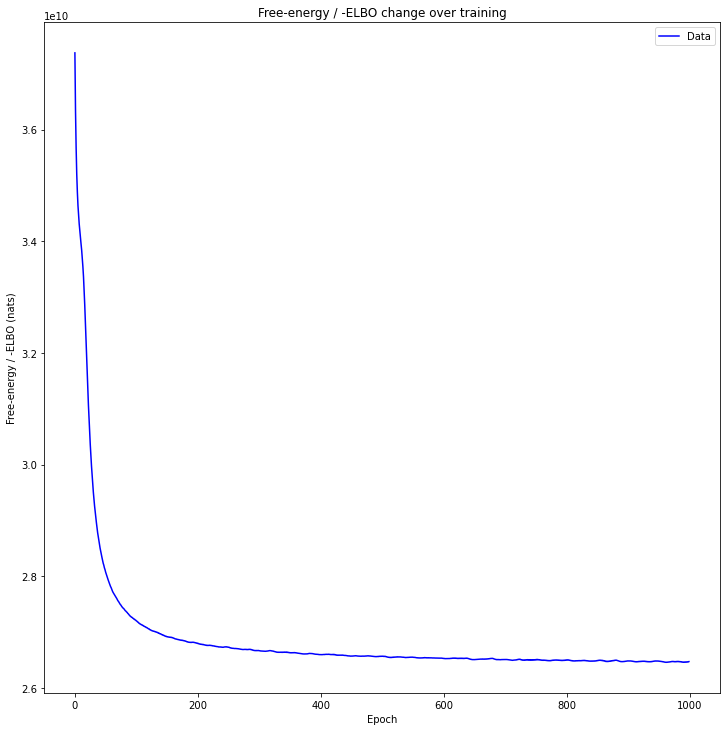

In [14]:
utils.plot_losses(losses)

In [15]:
len(dtfa.subjects())

6

In [16]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


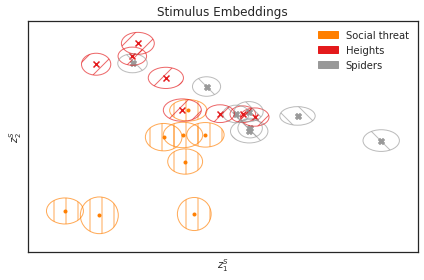

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [18]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


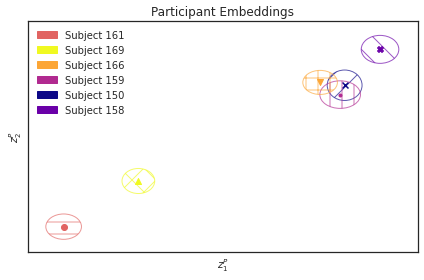

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [20]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/20/2021 18:11:42 Plotting factors for Participant 159, run 1


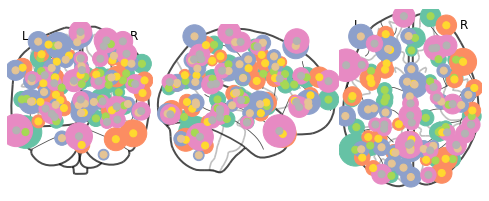

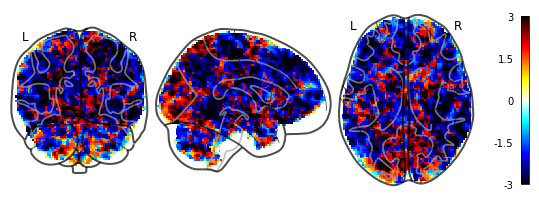

10/20/2021 18:11:51 Reconstruction Error (Frobenius Norm): 5.22744629e+02 out of 4.55824951e+02


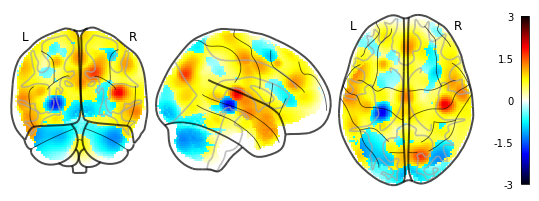

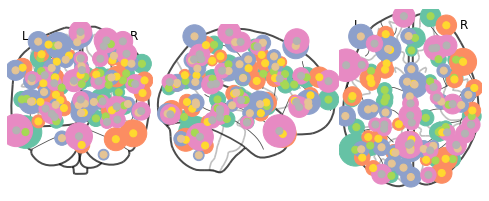

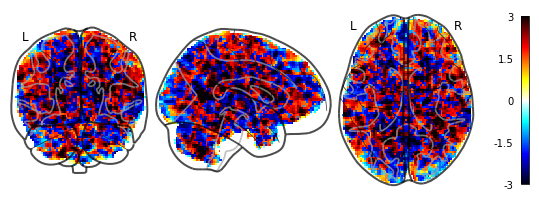

10/20/2021 18:12:01 Reconstruction Error (Frobenius Norm): 4.73909973e+02 out of 4.13657440e+02


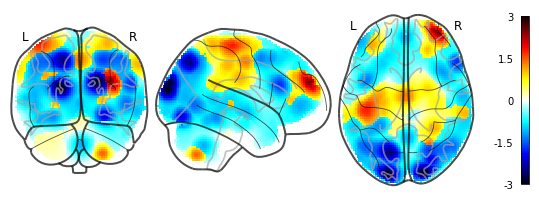

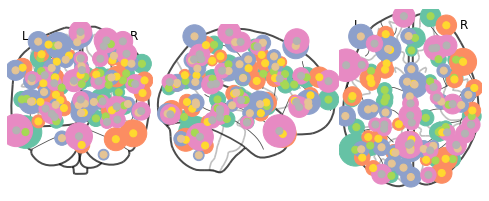

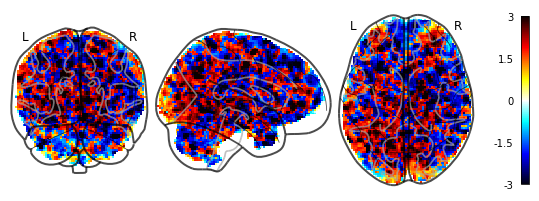

10/20/2021 18:12:13 Reconstruction Error (Frobenius Norm): 4.69159607e+02 out of 4.12480896e+02


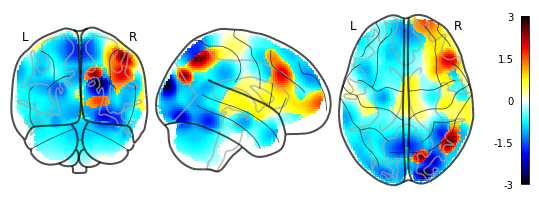

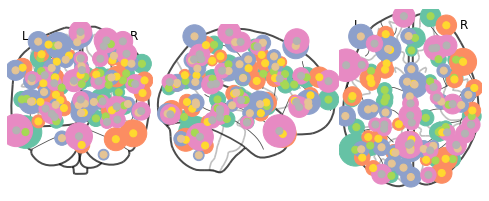

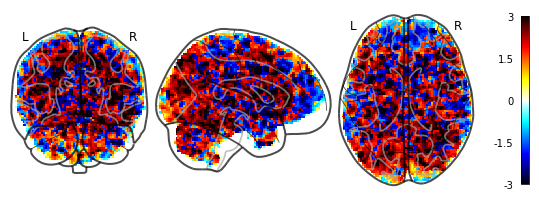

10/20/2021 18:12:25 Reconstruction Error (Frobenius Norm): 5.16312683e+02 out of 4.16741150e+02


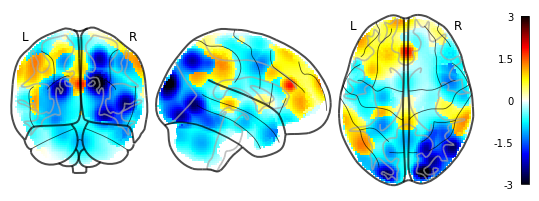

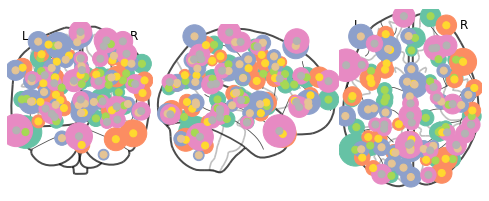

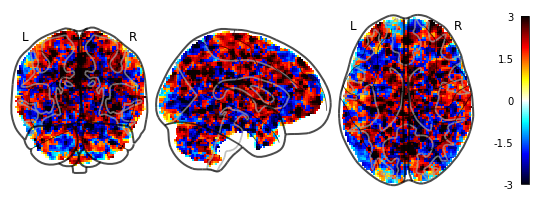

10/20/2021 18:12:38 Reconstruction Error (Frobenius Norm): 4.52627197e+02 out of 4.22615753e+02


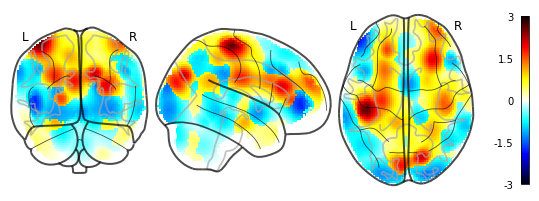

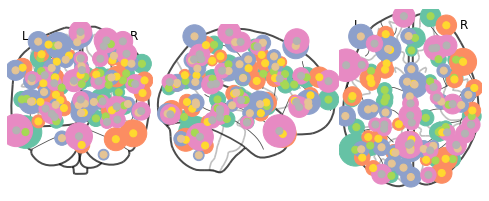

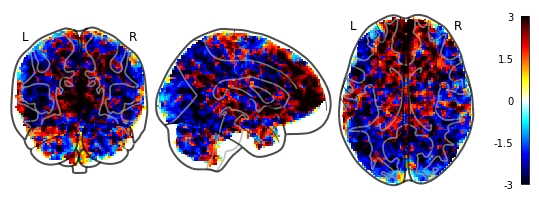

10/20/2021 18:12:52 Reconstruction Error (Frobenius Norm): 4.91673492e+02 out of 4.69324371e+02


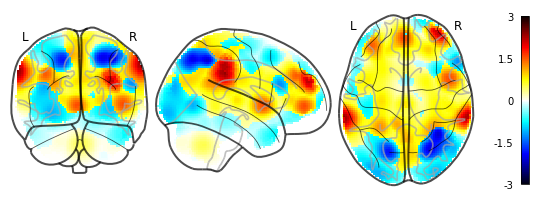

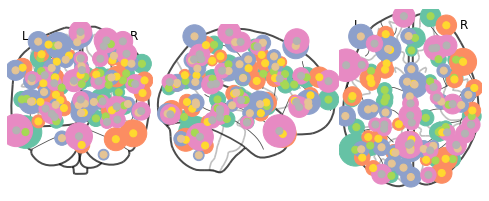

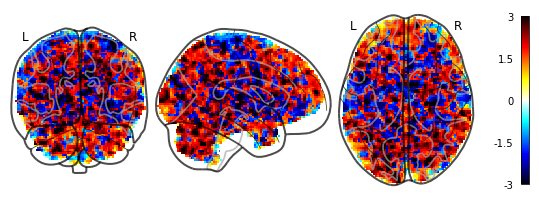

10/20/2021 18:13:07 Reconstruction Error (Frobenius Norm): 4.44879578e+02 out of 3.97955963e+02


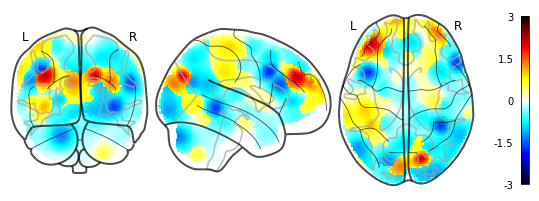

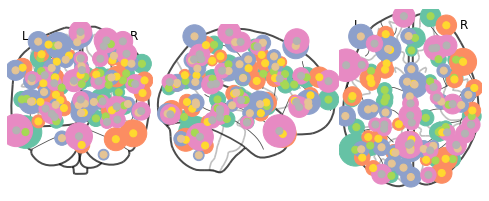

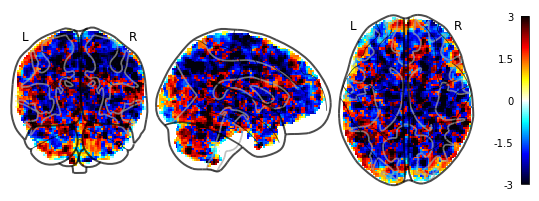

10/20/2021 18:13:23 Reconstruction Error (Frobenius Norm): 4.61545319e+02 out of 4.27659760e+02


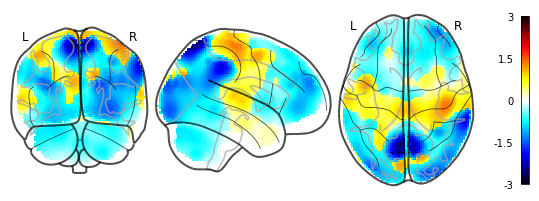

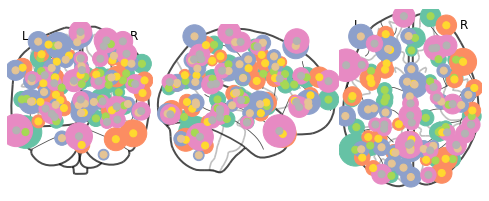

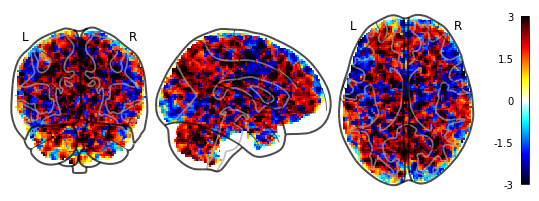

10/20/2021 18:13:39 Reconstruction Error (Frobenius Norm): 4.78783600e+02 out of 4.30525665e+02


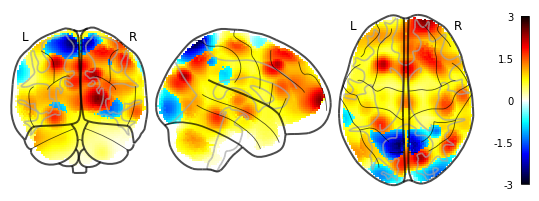

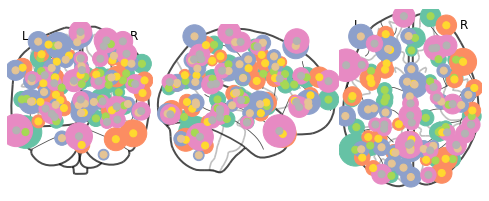

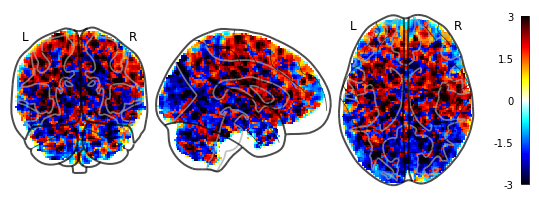

10/20/2021 18:13:57 Reconstruction Error (Frobenius Norm): 4.94437195e+02 out of 4.15524780e+02


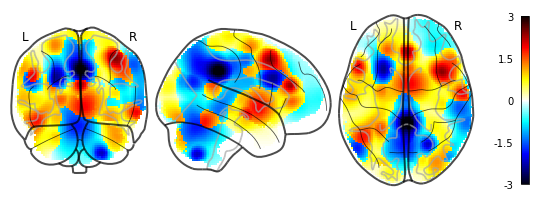

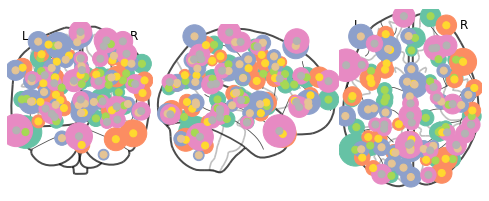

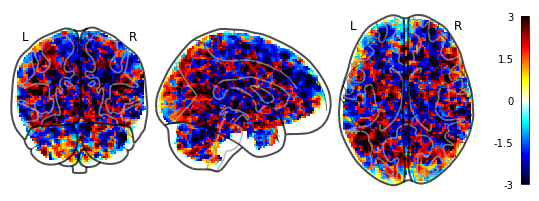

10/20/2021 18:14:16 Reconstruction Error (Frobenius Norm): 4.33560181e+02 out of 4.10976227e+02


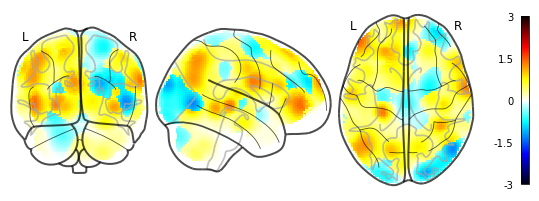

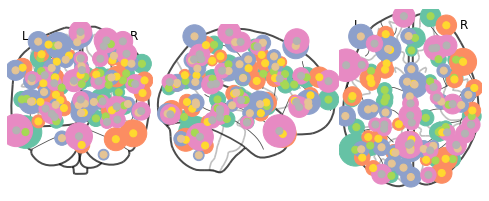

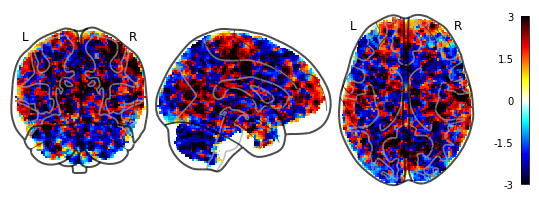

In [ ]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [ ]:
z_ps_mu

In [ ]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])